### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [6]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [5]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1

**What is the most common day of week?**

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,11-06-2017 00:00:00,20-06-11 00:00:00,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,11-05-2017 00:00:00,20-05-11 00:00:00,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,29-03-2017 00:00:00,20-03-29 00:00:00,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,08-05-2017 00:00:00,20-05-8 00:00:00,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,21-06-2017 00:00:00,20-06-21 00:00:00,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,22-02-2017 00:00:00,20-02-22 00:00:00,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

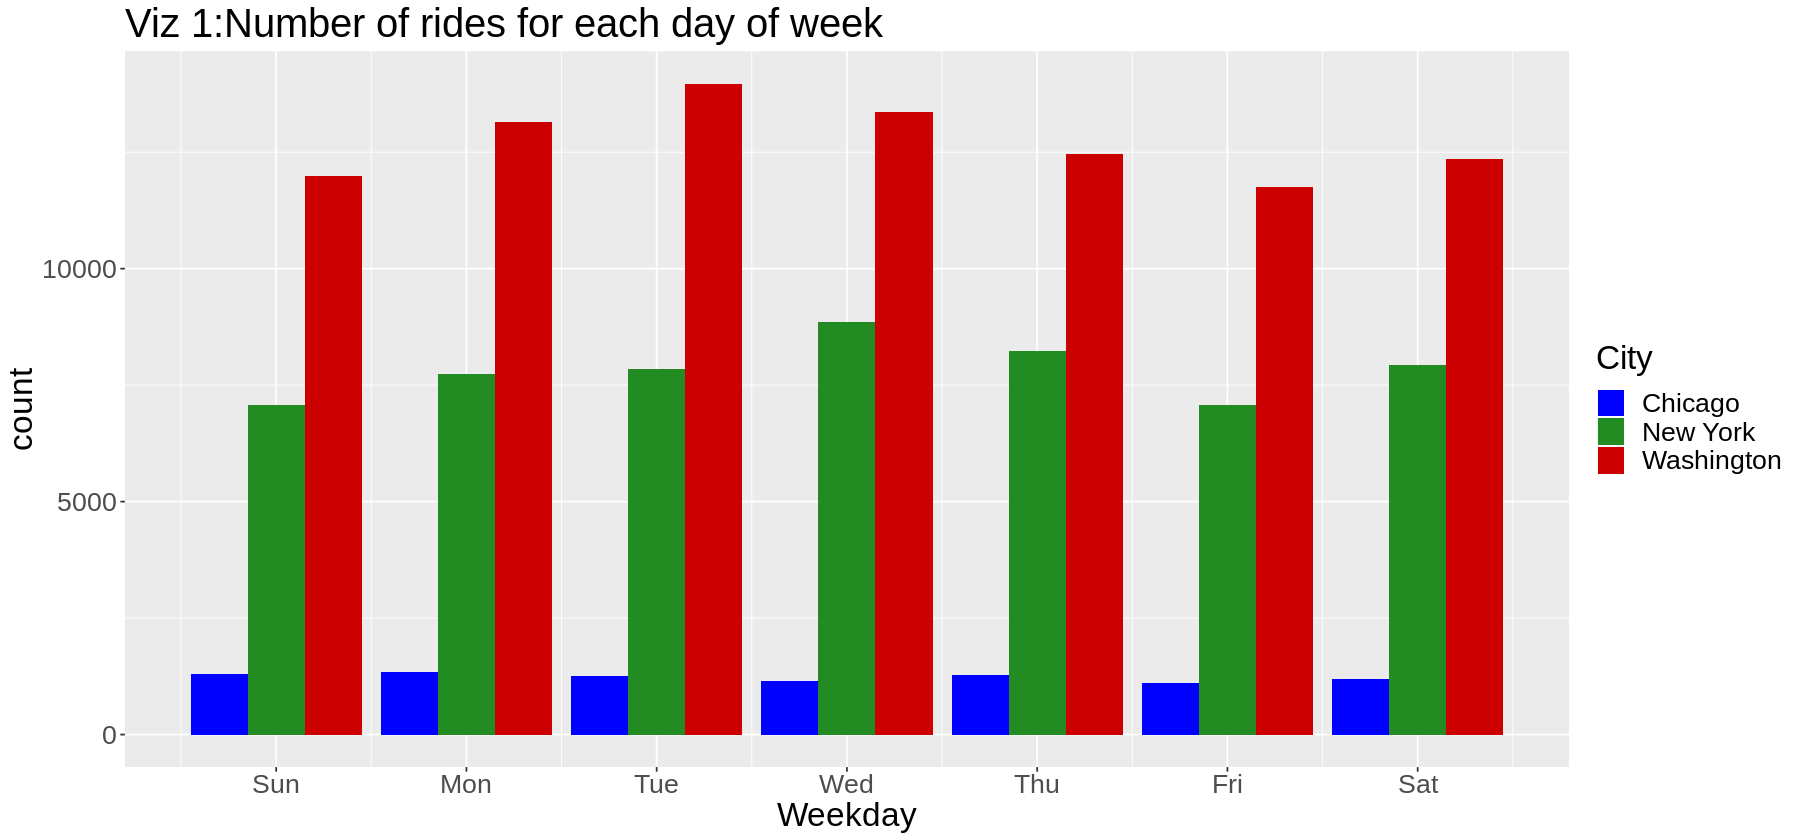

In [7]:
#install.packages("anytime") # Not able to install this package
#library(anytime) # Quickly convert to time objects with `anytime` function
#library(lubridate) # This is required to calculate weekday `wday` function

library(ggplot2)

# Add the missing columns in Washington 

wash$Gender <- NA
wash$Birth.Year <- NA
wash$City <- 'Washington'
ny$City <- 'New York'
chi$City <- 'Chicago'

# Concatenate the dataframes
df <- rbind(ny,wash,chi)

#df$Start.Time <- as.POSIXct(date, format = "%m/%d/%Y %H:%M:%S")

# Fix the Date Format

#df_$Start.Time <- anytime(df_$Start.Time)
df$Start.Time <- format(as.Date(df$Start.Time), "%d-%m-%Y %H:%M:%S")
df$End.Time <- format(as.Date(df$Start.Time), "%d-%m-%Y %H:%M:%S")
head(df)
options(repr.plot.width=15, repr.plot.height=7)
df$Weekday <- wday(df$Start.Time)

ggplot(aes(x=Weekday, fill=City), data=df) +
    geom_bar(position='dodge') + 
    scale_fill_manual(values = c("blue", "#228B22", "#cc0000")) +
    scale_x_continuous(breaks=c(1,2,3,4,5,6,7), labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Viz 1:Number of rides for each day of week")

The most common day is Tuesday, and it shows a kind of normal distribution accross all three cities. This trend is uniform in both New York and Washington, while for Chicago it is not very clear. Let's see for only Chicago data to get a clearer picture:

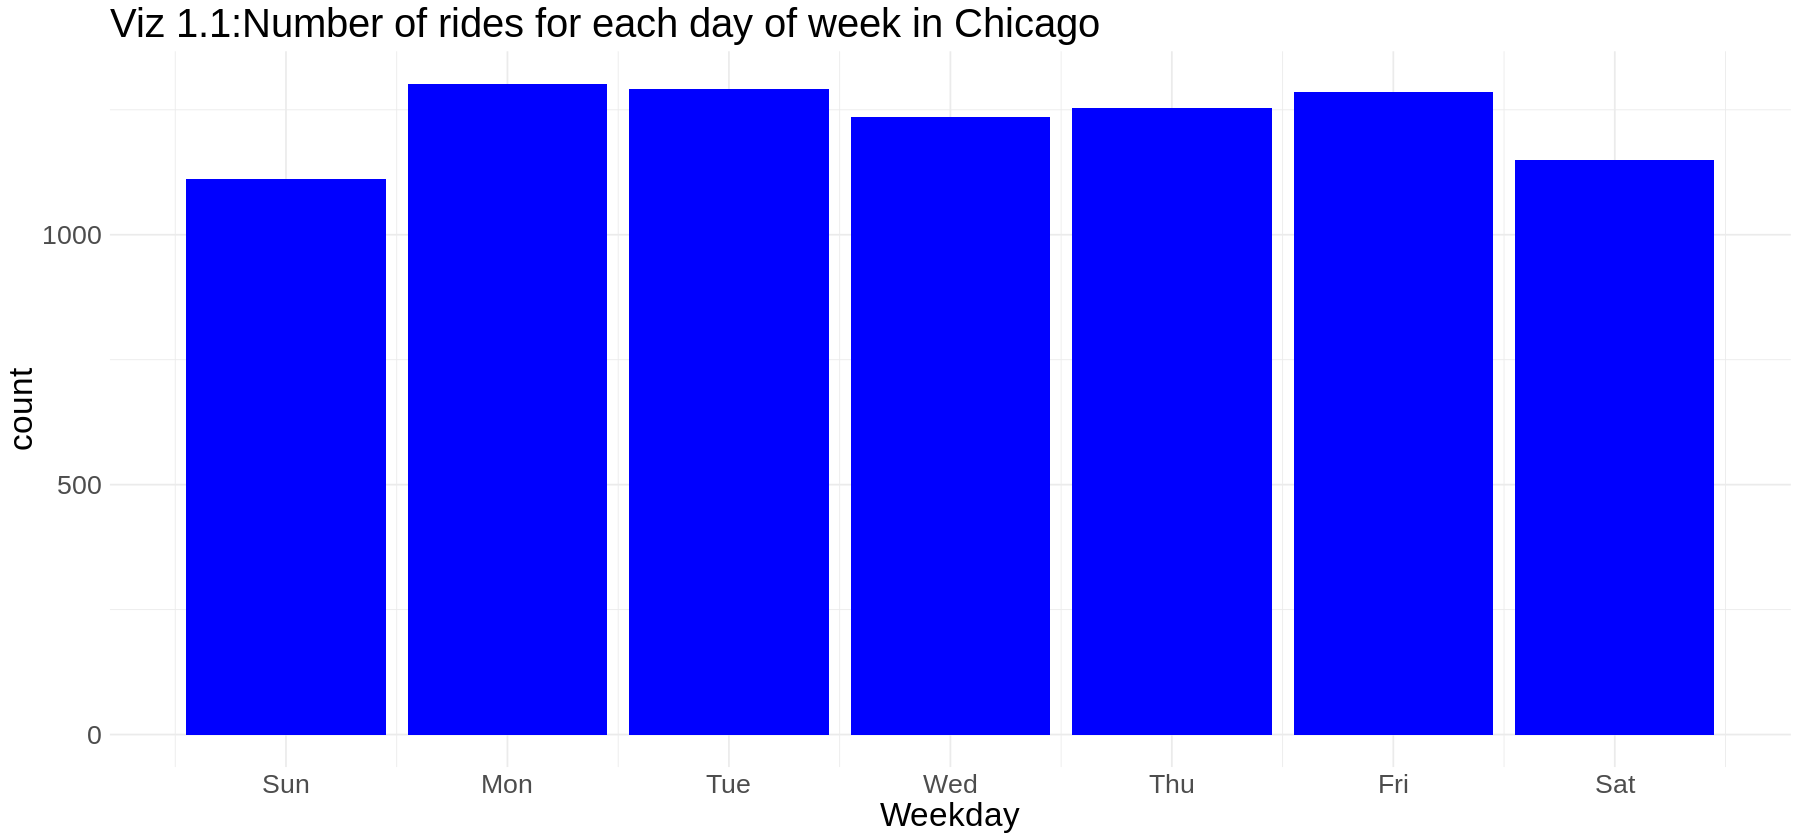

In [8]:

# Create weekday field for Chicago.
chi$Weekday <- wday(chi$Start.Time)

ggplot(aes(x=Weekday), data=chi) +
   geom_bar(position='dodge', fill="blue")+ 
   theme_minimal()+
   # geom_bar(position='dodge') +
   # scale_fill_manual(values = c("blue")) +
    scale_x_continuous(breaks=c(1,2,3,4,5,6,7), labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Viz 1.1:Number of rides for each day of week in Chicago")

**Trend is almost same for all 7 days . There are more than 1000 Rides every single day and pattern is obvious in Bar chart. It looks liks Chicago peeple are using almost every day  **

### Question 2

**Are male riders younger or older than female in New York in general?**

Warning message:
“Removed 5218 rows containing non-finite values (stat_boxplot).”

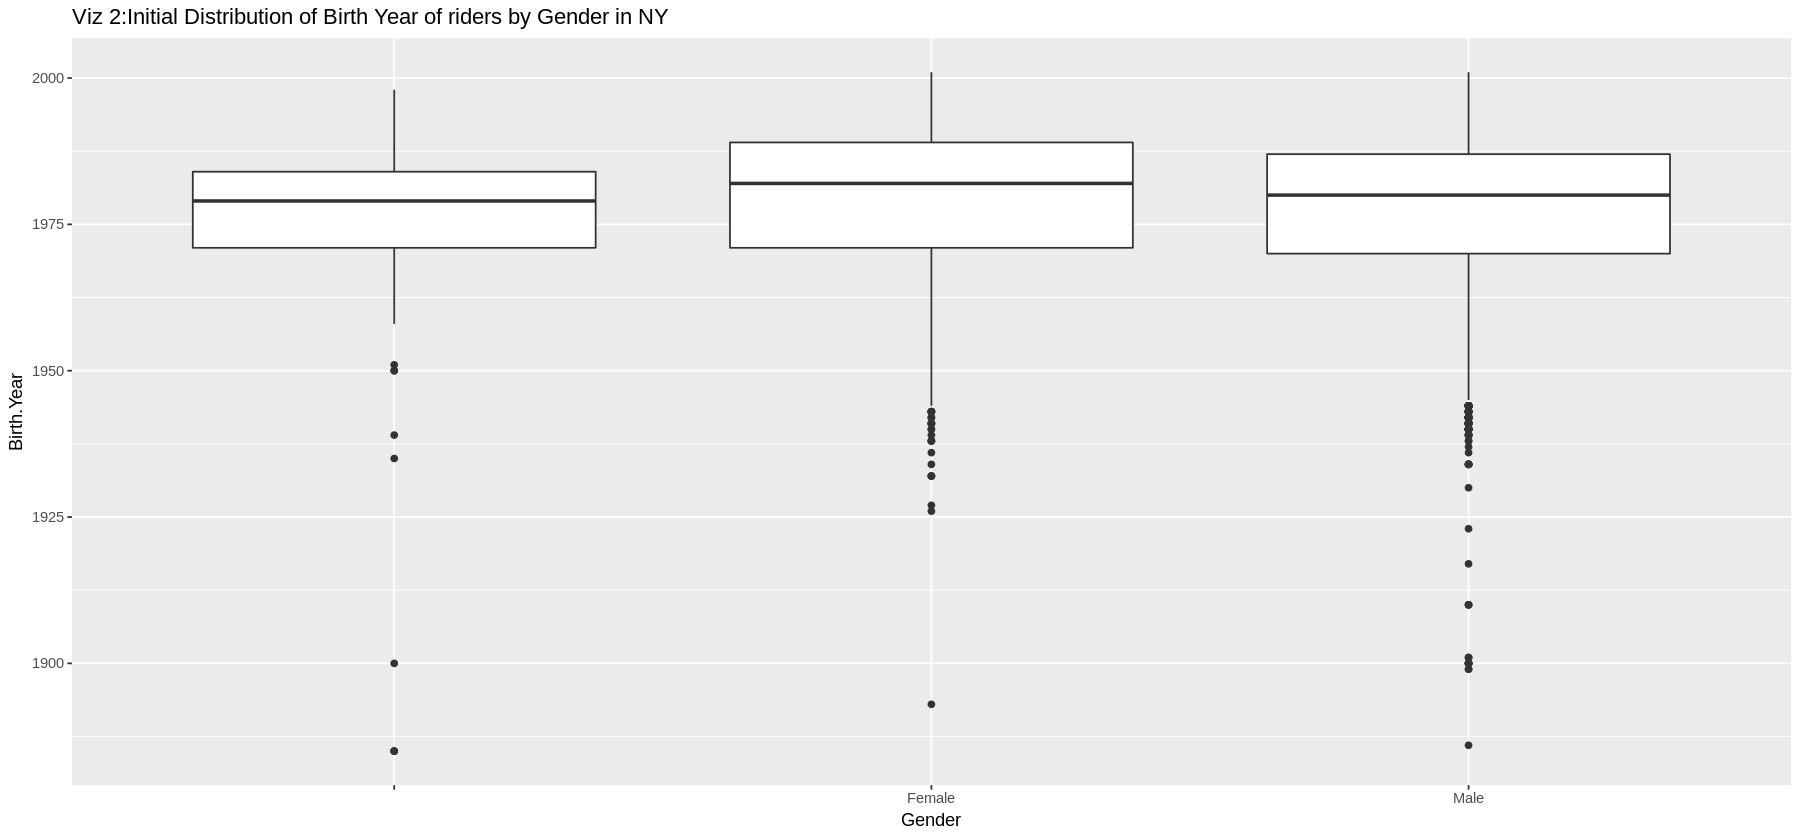

In [11]:
# Your solution code goes here
  qplot(x = Gender, y = Birth.Year, 
  data = subset(ny, !is.na(Gender)), 
  geom = 'boxplot') + 
  ggtitle('Viz 2:Initial Distribution of Birth Year of riders by Gender in NY')

Warning message:
“Removed 5218 rows containing non-finite values (stat_boxplot).”

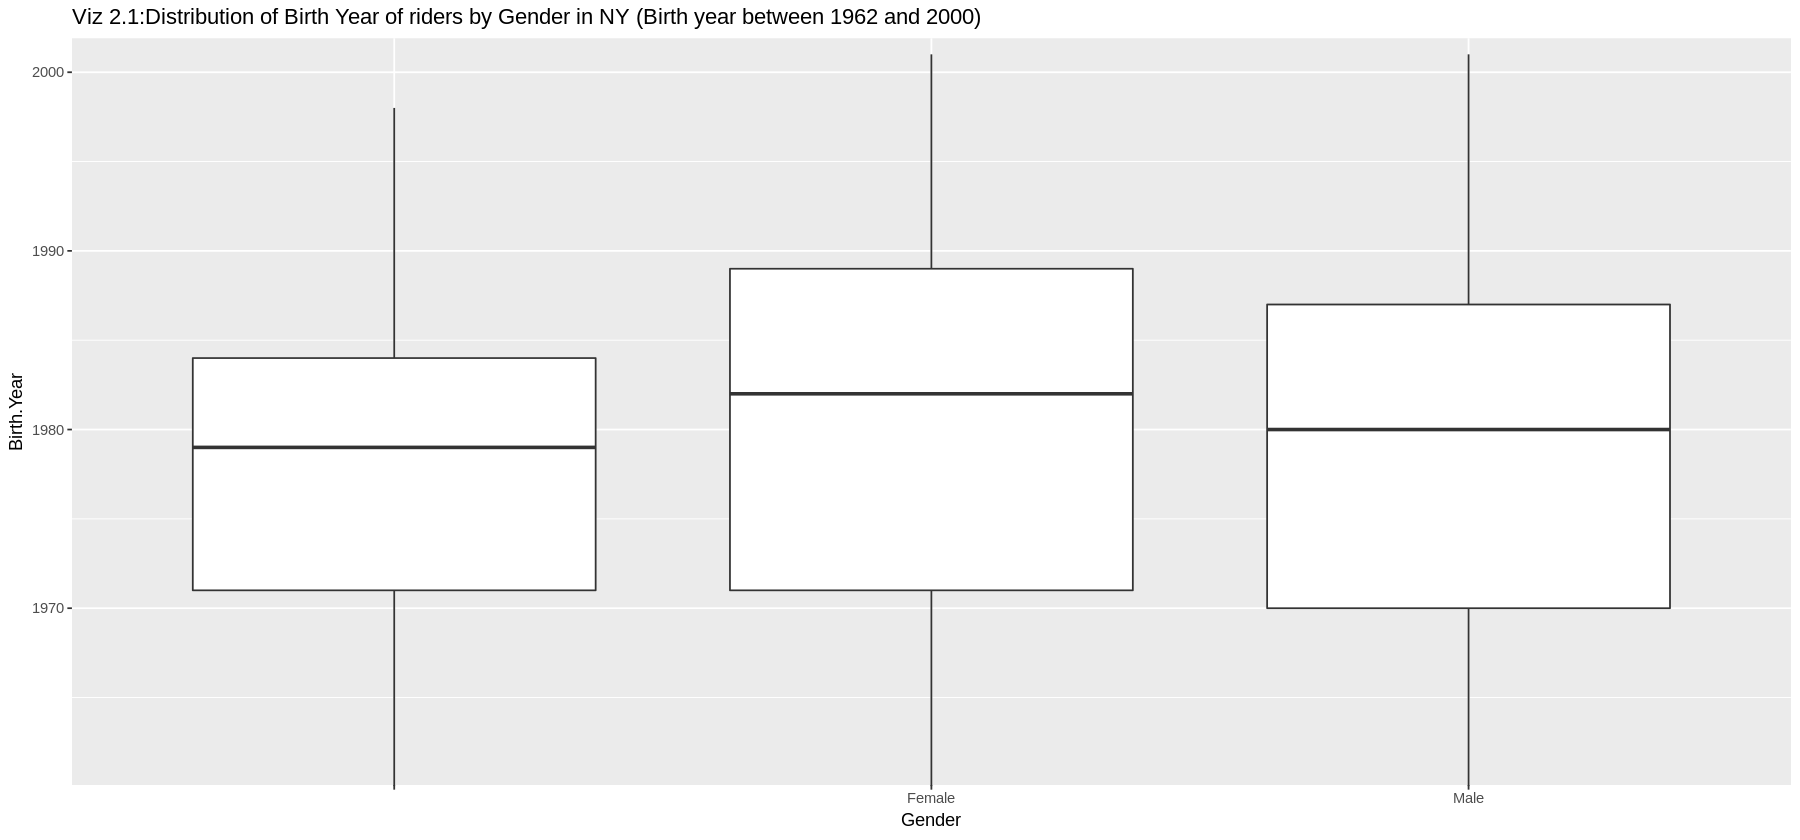

In [12]:
#Plotting again the distribution of birth year by gender by zooming (Birth year between 1962 and 2000)
qplot(x = Gender, y = Birth.Year, 
  data = subset(ny, !is.na(Gender)), 
  geom = 'boxplot') + 
  coord_cartesian(ylim = c(1962,2000))+
  ggtitle('Viz 2.1:Distribution of Birth Year of riders by Gender in NY (Birth year between 1962 and 2000)')


In [13]:
#Running a descriptive summary to compare distributions across the two groups
by(ny$Birth.Year, ny$Gender, summary)

ny$Gender: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1885    1971    1979    1976    1984    1998    5217 
------------------------------------------------------------ 
ny$Gender: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1893    1971    1982    1979    1989    2001       1 
------------------------------------------------------------ 
ny$Gender: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1886    1970    1980    1978    1987    2001 

I've been taught that median should be used with range and mean with standard deviation. When we talk about age, I think range is a more relevant way to express the spread, and easier to understand for most. For example in a study population, the mean age was 53 (SD 5.4) or the median age was 48 (range 23-77). For that reason, I would prefer to use median rather than mean. But I would be very interested to here what a statistician or stats pro would say about using mean with range?

**As per the data, Specially the summary statistics  it looks like Male is younger than female who drove bikes .**

### Question 3

**What is the most common time of day for the ride?**

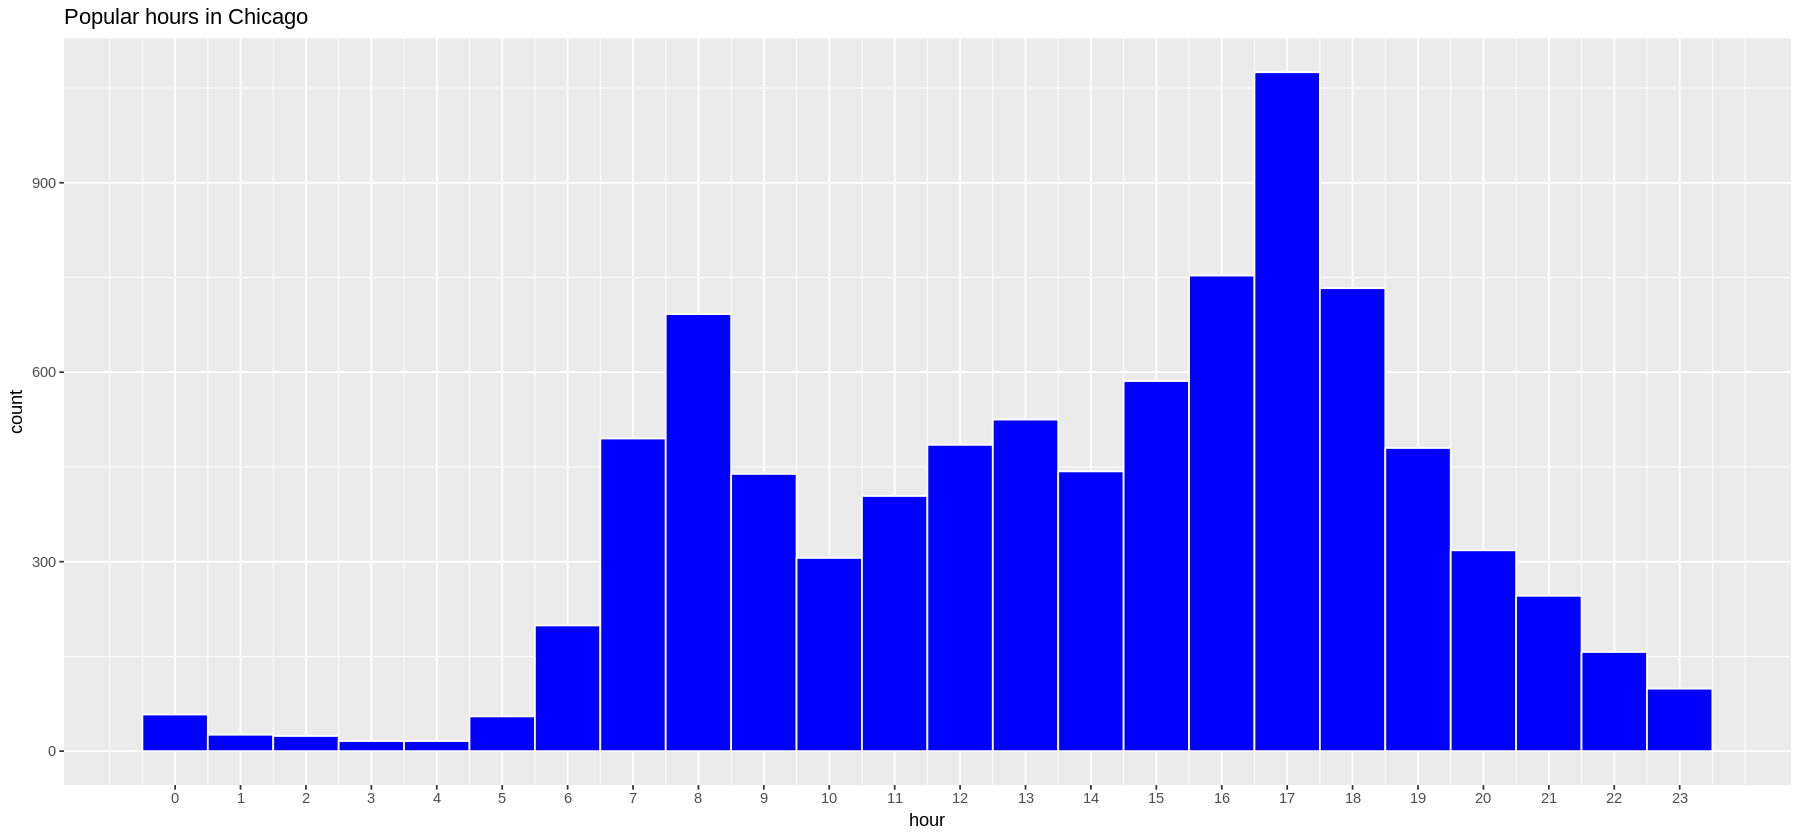

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

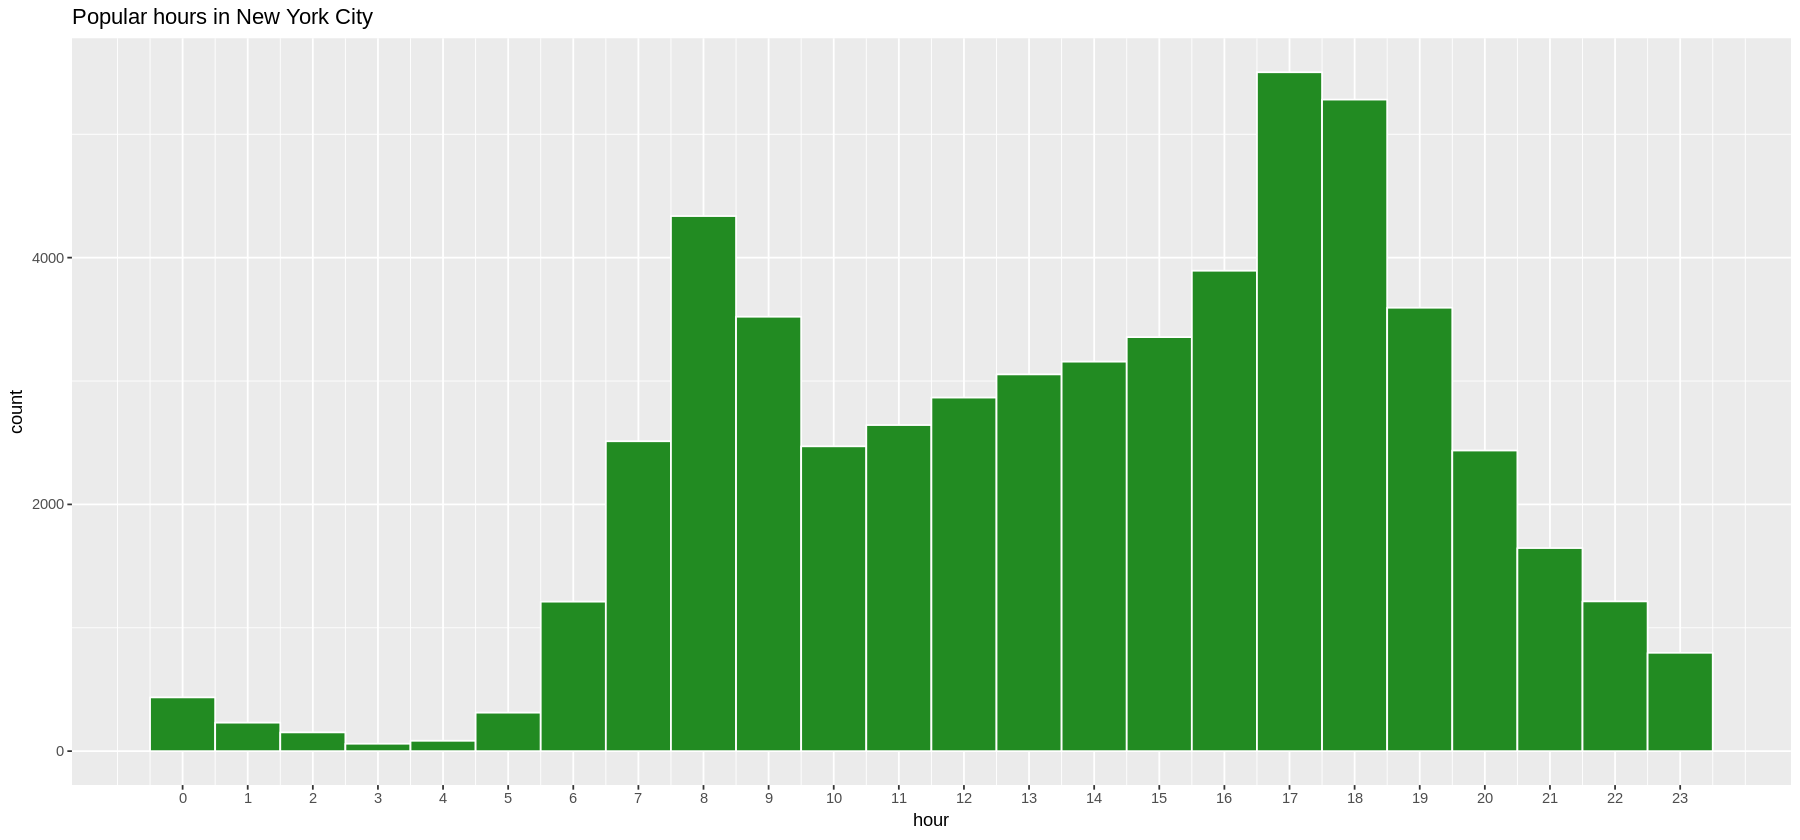

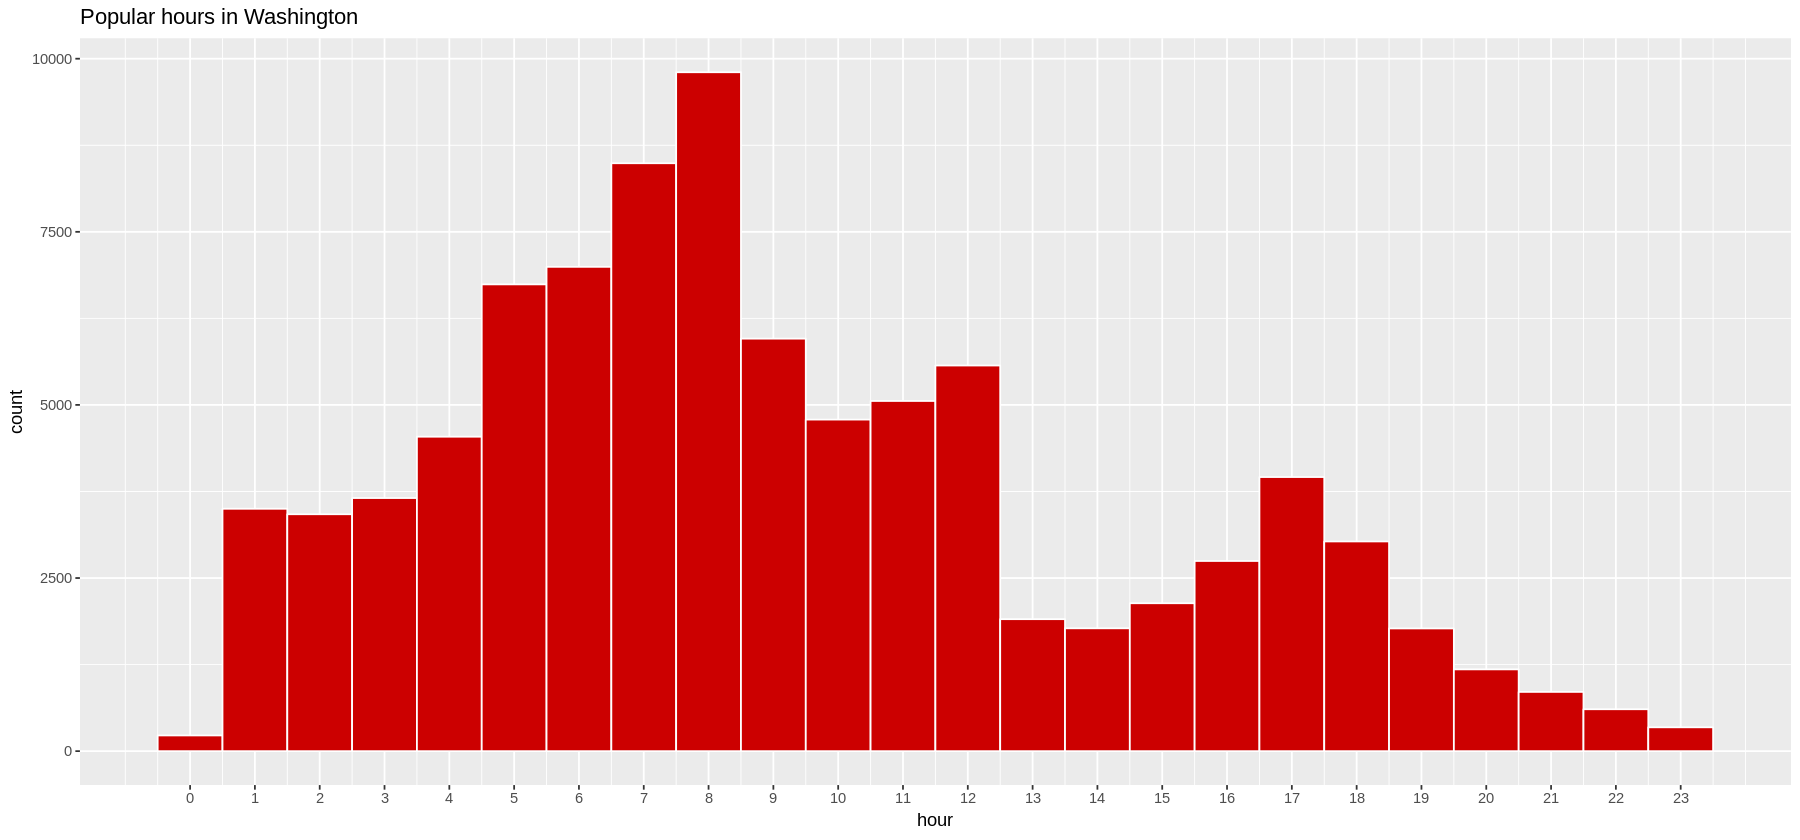

In [15]:
# Your solution code goes here
library(readr)
library(dplyr)
library(ggplot2)
library(lubridate)

#Extract date time and day month. 
#The timestamp is in dttm format. We will use the library lubridate to extract month day and hour of the day.


ny$Start.Time <- ymd_hms(ny$Start.Time)
ny$End.Time <- ymd_hms(ny$End.Time)


wash$Start.Time <- ymd_hms(wash$Start.Time)
wash$End.Time <- ymd_hms(wash$End.Time)


chi$Start.Time <- ymd_hms(chi$Start.Time)
chi$Start.Time <- ymd_hms(chi$End.Time)

#Created a function to extract hour, month and day from start_time of all three csv files

extracttime <- function(df){
  df$hour <- hour(df$Start.Time)
  df$month <- month(df$Start.Time)
  df$day <- weekdays(df$Start.Time)
  return(df)
}

chi <- extracttime(chi)
ny <- extracttime(ny)
wash <- extracttime(wash)


#Popular hours in Chicago

ggplot(chi, aes(hour)) + geom_histogram(bins = 24, fill="blue", color = I('white'))+  
  scale_x_continuous(breaks = seq(0,23,1))+
  xlab("hour") +  ylab("count")+ ggtitle("Popular hours in Chicago")

#Popular hours in NewYork

ggplot(ny, aes(hour)) + geom_histogram(bins = 24, fill="#228B22",color = I('white'))+  
  scale_x_continuous(breaks = seq(0,23,1))+
  xlab("hour") +  ylab("count")+ ggtitle("Popular hours in New York City")

#Popular hours in Washington

ggplot(wash, aes(hour)) + geom_histogram(bins = 24,fill="#cc0000" , color = I('white'))+  
  scale_x_continuous(breaks = seq(0,23,1))+
  xlab("hour") +  ylab("count")+ ggtitle("Popular hours in Washington")

**The morning peak hour in all three cities is at 8 am and evening peak hour is 5-6 pm . This is obvious as well because its peak office time .Traffic during the morning “rush hour” is generally more than during the evening “rush hour”. To Keep it consistent I am using the Same hex color code throughout the visualisation **


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [16]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')